In [83]:
# Standard library.
import itertools

# Standard data science.
import numpy as np
import pandas as pd

# Data science.
# None here.

# Display and plotting imports.
from IPython.display import display, Markdown, Latex

import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms

# Display and plotting configuration.
%matplotlib inline

import seaborn as sns


## Long form vs. wide-form data

In [3]:
df_flights = sns.load_dataset('flights')
display(df_flights.head())
df_flights.shape

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


(144, 3)

* Plot by month

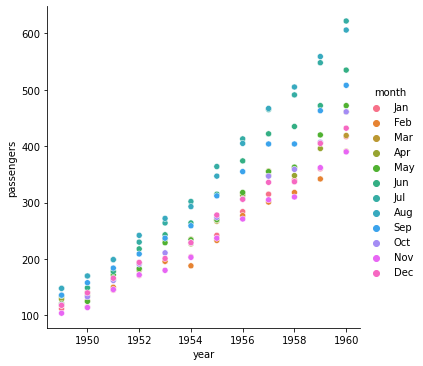

In [4]:
sns.relplot(data = df_flights, x = 'year', y = 'passengers', hue = 'month')

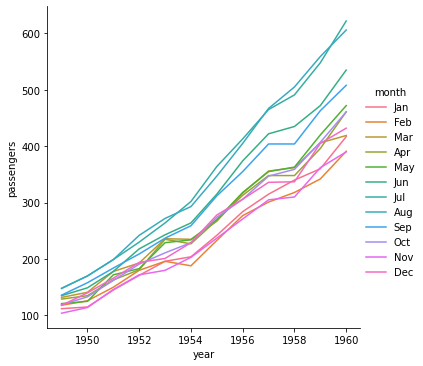

In [5]:
sns.relplot(data = df_flights, x = 'year', y = 'passengers', hue = 'month', kind = 'line')

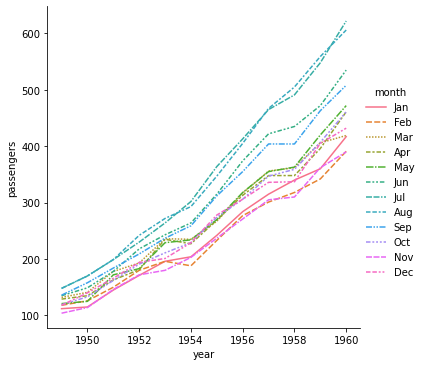

In [18]:
sns.relplot(data = df_flights, x = 'year', y = 'passengers', hue = 'month', kind = 'line', style = 'month')

## wide form data

In [8]:
flights_wide = df_flights.pivot(index = 'year', columns = 'month', values = 'passengers')
display(flights_wide.head())
flights_wide.shape

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


(12, 12)

In [14]:
flights_wide.columns

CategoricalIndex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                  'Sep', 'Oct', 'Nov', 'Dec'],
                 categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', ...], ordered=False, name='month', dtype='category')

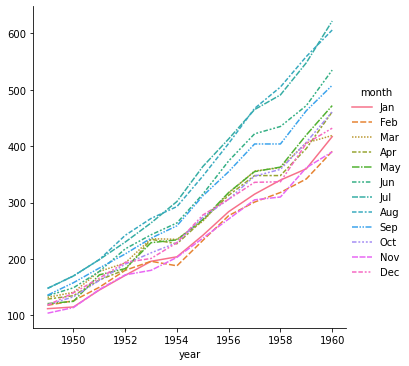

In [17]:
sns.relplot(data = flights_wide, kind = "line")

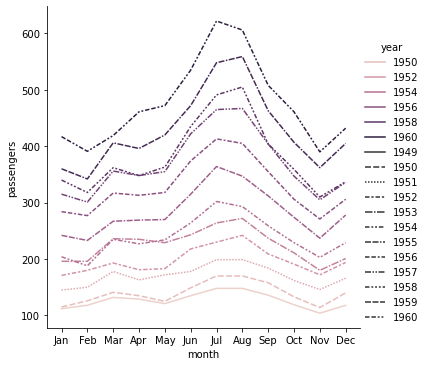

In [20]:
sns.relplot(data = df_flights, x = 'month', y = 'passengers', hue = 'year', kind = 'line', style = 'year')

In [21]:
flights_wide.transpose()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


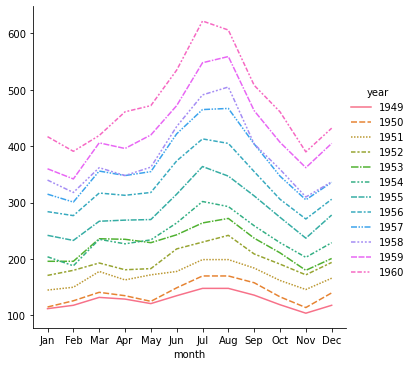

In [22]:
sns.relplot(data = flights_wide.transpose(), kind = 'line')

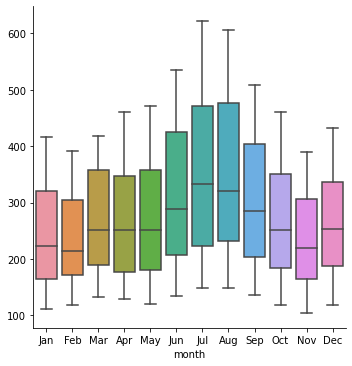

In [24]:
sns.catplot(data = flights_wide, kind = 'box')

## Messy data

In [26]:
anagrams = sns.load_dataset('anagrams')
display(anagrams.shape)
anagrams.head()

(20, 5)

,subidr,attnr,num1,num2,num3
0,1,divided,2,4.0,7
1,2,divided,3,4.0,5
2,3,divided,3,5.0,6
3,4,divided,5,7.0,5
4,5,divided,4,5.0,8


In [28]:
anagrams_long = anagrams.melt(id_vars = ['subidr', 'attnr'], var_name = 'solutions', value_name= 'score')
display(anagrams_long.shape)
anagrams_long.head()

(60, 4)

,subidr,attnr,solutions,score
0,1,divided,num1,2.0
1,2,divided,num1,3.0
2,3,divided,num1,3.0
3,4,divided,num1,5.0
4,5,divided,num1,4.0


In [31]:
anagrams_long.attnr.unique()

array(['divided', 'focused'], dtype=object)

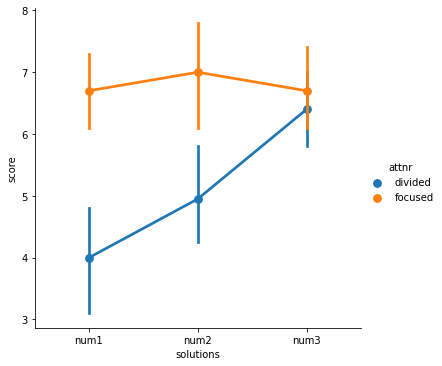

In [35]:
sns.catplot(data = anagrams_long, x = 'solutions', y = 'score', hue = 'attnr', kind = 'point')

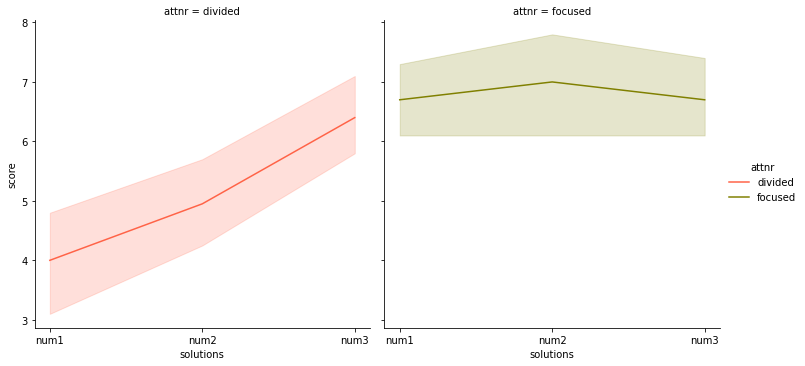

In [60]:
c_map = ['tomato', 'olive']
sns.relplot(data = anagrams_long, x = 'solutions', y = 'score', hue = 'attnr', col = 'attnr',kind = 'line', col_wrap =2, palette = c_map)

## Options for visualizing long-form data

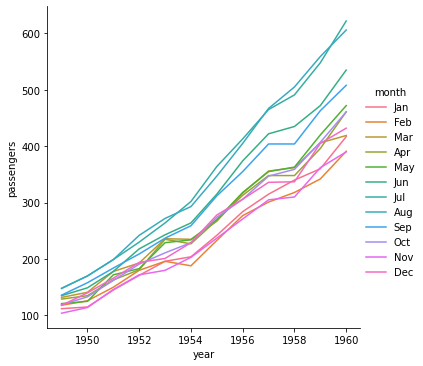

In [41]:
flights_dict = df_flights.to_dict()
sns.relplot(data = flights_dict, x = 'year', y = 'passengers', hue = 'month', kind = 'line')

In [43]:
df_flights.groupby('year').mean()

,passengers
year,
1949,126.666667
1950,139.666667
1951,170.166667
1952,197.000000
1953,225.000000
1954,238.916667
1955,284.000000
1956,328.250000
1957,368.416667


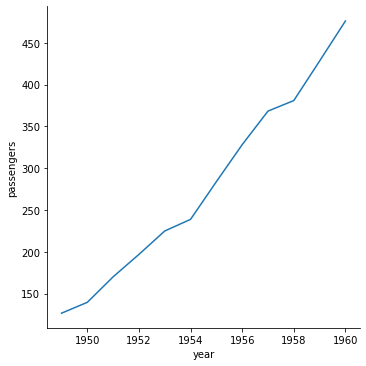

In [61]:
flights_mean = df_flights.groupby('year').mean()
sns.relplot(data = flights_mean, x = 'year', y = 'passengers', kind ='line' )

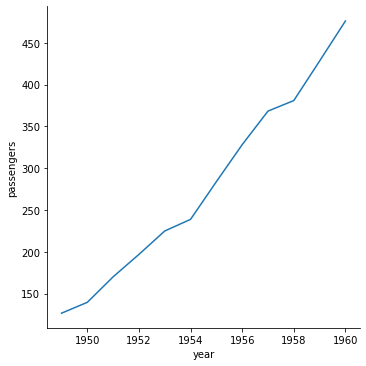

In [62]:
year = flights_mean.index
passengers = flights_mean["passengers"]
sns.relplot(x=year, y=passengers, kind="line")

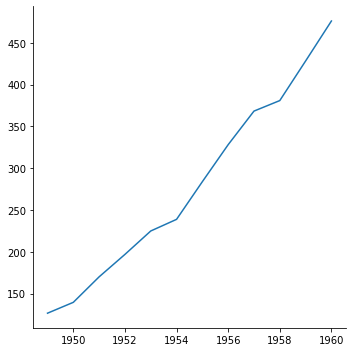

In [63]:
sns.relplot(x=year.to_numpy(), y=passengers.to_list(), kind="line")

## Options for visualizing wide-form data

In [73]:
flights_wide_list = [col for _, col in flights_wide.items()]
flights_wide_list

[year
 1949    112
 1950    115
 1951    145
 1952    171
 1953    196
 1954    204
 1955    242
 1956    284
 1957    315
 1958    340
 1959    360
 1960    417
 Name: Jan, dtype: int64,
 year
 1949    118
 1950    126
 1951    150
 1952    180
 1953    196
 1954    188
 1955    233
 1956    277
 1957    301
 1958    318
 1959    342
 1960    391
 Name: Feb, dtype: int64,
 year
 1949    132
 1950    141
 1951    178
 1952    193
 1953    236
 1954    235
 1955    267
 1956    317
 1957    356
 1958    362
 1959    406
 1960    419
 Name: Mar, dtype: int64,
 year
 1949    129
 1950    135
 1951    163
 1952    181
 1953    235
 1954    227
 1955    269
 1956    313
 1957    348
 1958    348
 1959    396
 1960    461
 Name: Apr, dtype: int64,
 year
 1949    121
 1950    125
 1951    172
 1952    183
 1953    229
 1954    234
 1955    270
 1956    318
 1957    355
 1958    363
 1959    420
 1960    472
 Name: May, dtype: int64,
 year
 1949    135
 1950    149
 1951    178
 1952    218
 1

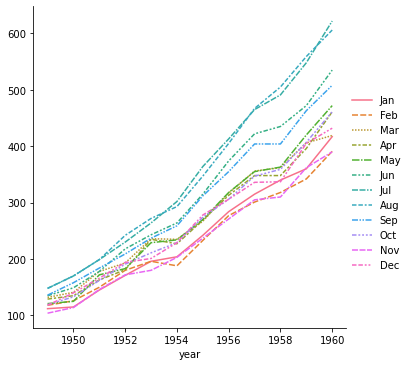

In [75]:
sns.relplot(data = flights_wide_list, kind = 'line')

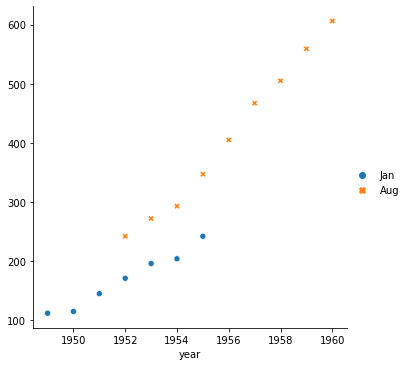

In [77]:
two_series = [flights_wide.loc[:1955, "Jan"], flights_wide.loc[1952:, "Aug"]]
sns.relplot(data=two_series, kind="scatter")

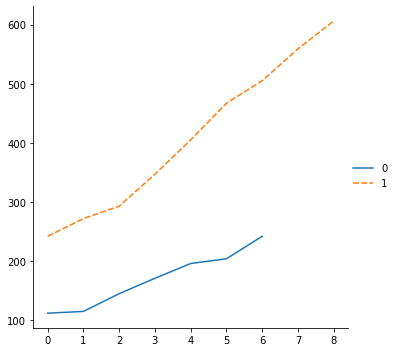

In [78]:
two_arrays = [s.to_numpy() for s in two_series]
sns.relplot(data=two_arrays, kind="line")

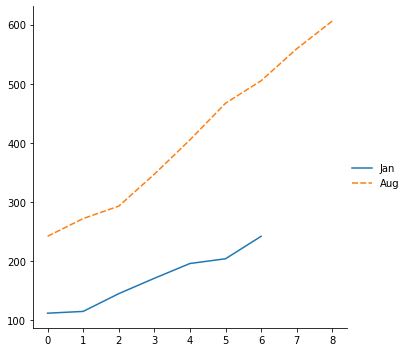

In [79]:
two_arrays_dict = {s.name: s.to_numpy() for s in two_series}
sns.relplot(data=two_arrays_dict, kind="line")

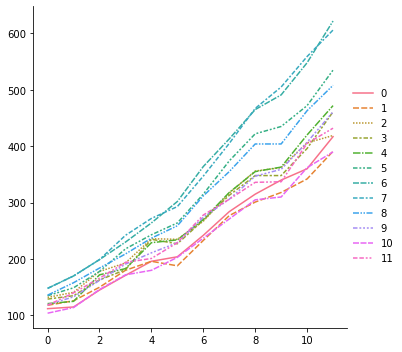

In [80]:
flights_array = flights_wide.to_numpy()
sns.relplot(data=flights_array, kind="line")

## Iris dataset

In [97]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [102]:
df_iris = sns.load_dataset("iris")
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [106]:
df_melted = df_iris.melt(id_vars = ['sepal_width','petal_width', 'species'], var_name = 'type', value_name ='length' )
display(df_melted.shape)
df_melted

(300, 5)

,sepal_width,petal_width,species,type,length
0,3.5,0.2,setosa,sepal_length,5.1
1,3.0,0.2,setosa,sepal_length,4.9
2,3.2,0.2,setosa,sepal_length,4.7
3,3.1,0.2,setosa,sepal_length,4.6
4,3.6,0.2,setosa,sepal_length,5.0
...,...,...,...,...,...
295,3.0,2.3,virginica,petal_length,5.2
296,2.5,1.9,virginica,petal_length,5.0
297,3.0,2.0,virginica,petal_length,5.2
298,3.4,2.3,virginica,petal_length,5.4


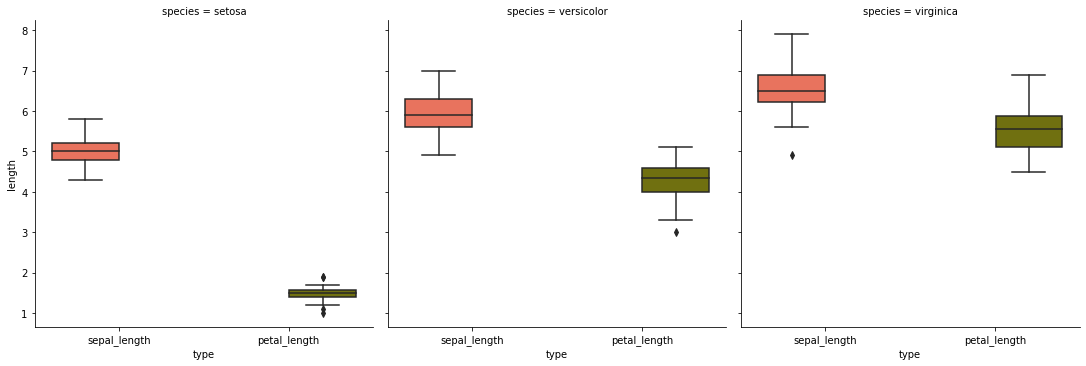

In [148]:
sns.catplot(data = df_melted, x = 'type', y = 'length', hue = 'type', 
    col = 'species', kind = 'box' , palette = ['tomato','olive'])